## R Map Generation

In [1]:
install.packages("devtools")
devtools::install_github("wmurphyrd/fiftystater")
library(fiftystater)
library(dplyr)
install.packages('rworldmap',dependencies=TRUE)
library(rworldmap)
library(readxl)
library(ggplot2)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Using github PAT from envvar GITHUB_TOKEN




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpjbPLDD/remotes16d4b276571a0/wmurphyrd-fiftystater-28e7fa5/DESCRIPTION’ ... OK
* preparing ‘fiftystater’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘fiftystater/data-raw’
* building ‘fiftystater_1.0.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘proxy’, ‘spam’, ‘maps’, ‘e1071’, ‘sp’, ‘maptools’, ‘fields’, ‘rgdal’, ‘rworldxtra’, ‘classInt’


Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in pla

Warning message:
“Unknown or uninitialised column: `region`.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


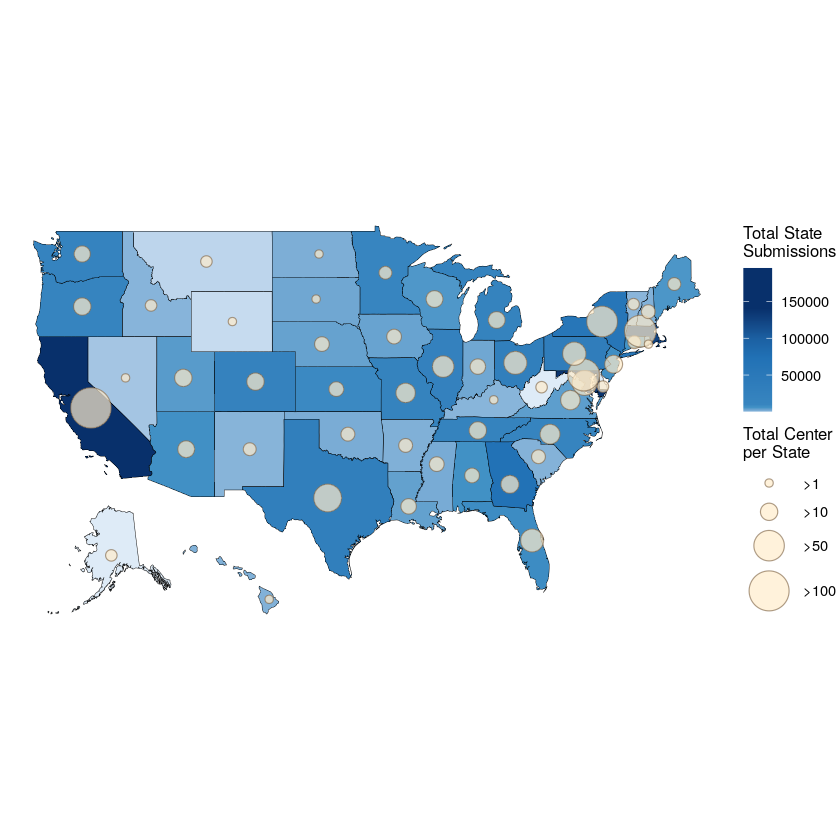

In [3]:
map <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/fiftystater_submissions.xlsx") 
center <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/us_centercount.xlsx")

color_breaks <- c(1,10,100,500,10000,100000,200000)
colors <- c('#deebf7','#c6dbef','#c6dbef','#4292c6', '#2171b5','#08306b')
count_breaks <- c(2,10,50,100)
labels <- c('>1','>10','>50','>100')

p1<-ggplot(data = map) + 
   geom_map(map = map, aes(map_id = id, fill = sample), color = "black", size=0.13) + 
  expand_limits(x = map$long, y = map$lat) +
  theme_void() +
  coord_fixed(1.3) +
 scale_fill_gradientn(limits = range(map$sample),colors =  colors[c(1, seq_along(colors), length(colors))], values  = c(0, scales::rescale(color_breaks, from = range(map$sample)), 1),guide="colorbar")+
    geom_point(data=center, aes(x=long, y=lat, size=center_count),colour="#8B7357",fill="#FFECCC",pch=21, alpha=I(0.7))+
  scale_size(range=c(2,11),breaks=count_breaks,labels=c(labels),guide="legend")+
  guides(fill=guide_colorbar("Total State \nSubmissions",order =1), size = guide_legend("Total Center\nper State", order=2)) + theme(legend.title=element_text(size=10))
 
 p1
 

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


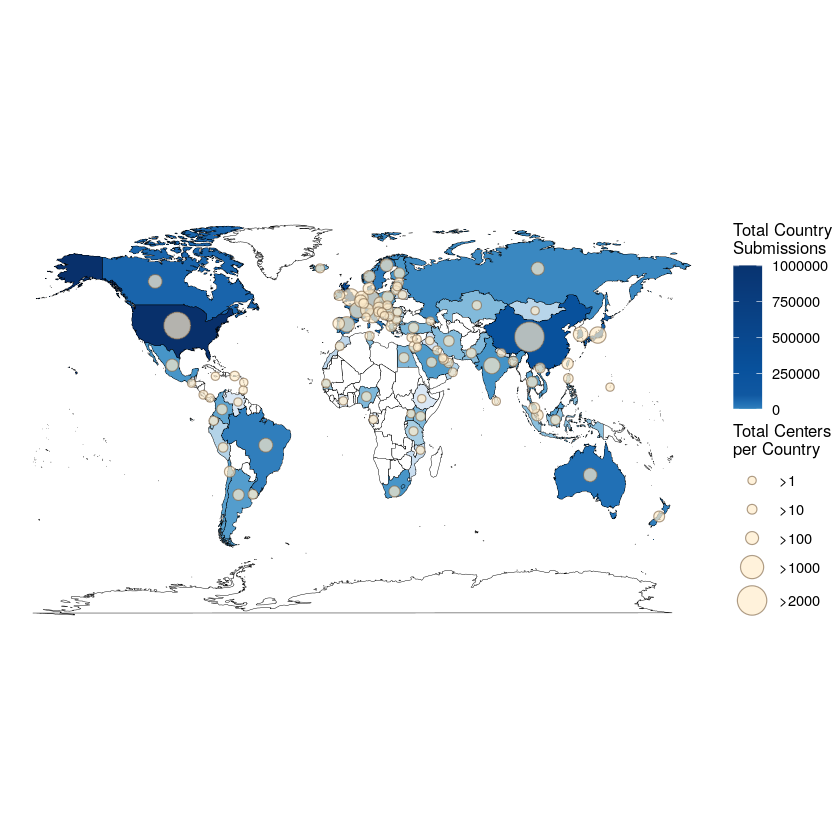

In [4]:
map <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx")
center <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/world_centercount.xlsx")

color_breaks <- c(0,1,10,100,1000,10000,100000,1000934)
colors <- c('white','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b')
count_breaks <- c(1,10,100,1000,2000)
labels <- c('>1','>10','>100','>1000','>2000')


p2<-ggplot(data = map) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = sample), color = "black", size=0.13)+
  coord_fixed(1.3) +
 scale_fill_gradientn(name = "Submissions",limits = range(map$sample),colors =  colors[c(1, seq_along(colors), length(colors))], values  = c(0, scales::rescale(color_breaks, from = range(map$sample)), 1),guide="colorbar")+
theme_void() + theme(legend.title=element_text(size = 9)) + geom_point(data=center, aes(x=long, y=lat, size=center_count),colour="#8B7357",fill="#FFECCC",pch=21, alpha=I(0.7))+scale_size(range=c(2,8),breaks=count_breaks,labels=c(labels),guide="legend") +
  guides(fill=guide_colorbar("Total Country \nSubmissions",order =1), size = guide_legend("Total Centers\nper Country", order=2)) + theme(legend.title=element_text(size=10))
p2


In [ ]:

ggsave(
    filename="SGMC/data/output/us_map.pdf",
    plot = p1,
    device = "pdf")

ggsave(
    filename="SGMC/data/output/world_map.pdf",
    plot = p2,
    device = "pdf")

